# Credit Card Churning Exploratory Data Analysis Project

The objective of this project is to help predict which customers are more likely to close their credit card or get churned. This would allow the bank to proactively go to these customers and provide them discounts or other services to retain these customers  

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read in the data 
df = pd.read_csv(r"C:\Users\Parmveer\Documents\Further Education\Credit Churning Pandas EDA Project\BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
# Check to see for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

CLIENTNUM - 0.0%
Attrition_Flag - 0.0%
Customer_Age - 0.0%
Gender - 0.0%
Dependent_count - 0.0%
Education_Level - 0.0%
Marital_Status - 0.0%
Income_Category - 0.0%
Card_Category - 0.0%
Months_on_book - 0.0%
Total_Relationship_Count - 0.0%
Months_Inactive_12_mon - 0.0%
Contacts_Count_12_mon - 0.0%
Credit_Limit - 0.0%
Total_Revolving_Bal - 0.0%
Avg_Open_To_Buy - 0.0%
Total_Amt_Chng_Q4_Q1 - 0.0%
Total_Trans_Amt - 0.0%
Total_Trans_Ct - 0.0%
Total_Ct_Chng_Q4_Q1 - 0.0%
Avg_Utilization_Ratio - 0.0%


In [4]:
# Analyze data types for our columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [5]:
df.groupby(by = 'Attrition_Flag').mean(numeric_only = True)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [6]:
# Nummerizing categorical variables to visualize them using correlation matrices
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        

df_numerized

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
# Correlations Matrix
df_numerized.corr(numeric_only = True)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.046430,0.007613,0.020188,0.006772,-0.003789,-0.003284,-0.025802,0.007511,0.134588,...,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,0.046430,1.000000,-0.018203,0.037272,-0.018991,-0.005551,-0.018597,-0.017584,0.006038,-0.013687,...,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,0.007613,-0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,...,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.020188,0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,...,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,0.006772,-0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,...,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.003789,-0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,...,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477
Marital_Status,-0.003284,-0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,...,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451
Income_Category,-0.025802,-0.017584,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,...,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287
Card_Category,0.007511,0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,...,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089
Months_on_book,0.134588,-0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,...,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541


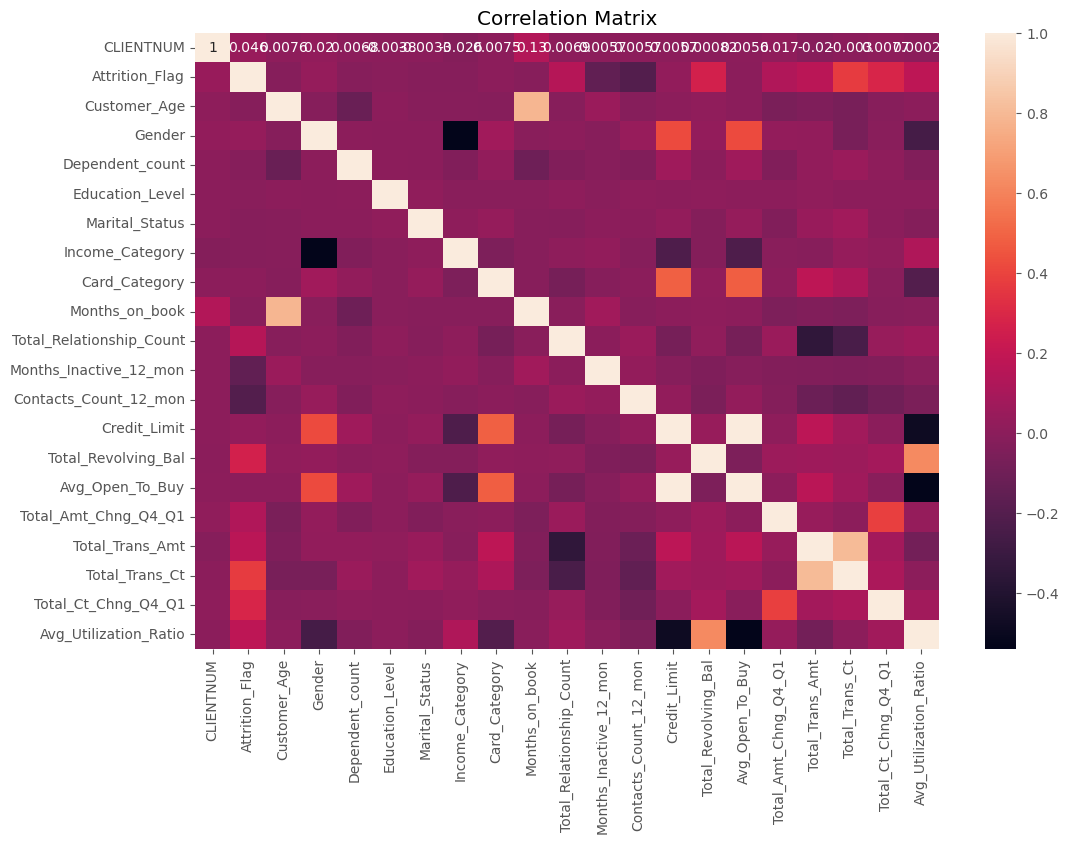

In [8]:
# Correlations Matrix Visualized
correlation_matrix = df_numerized.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

In [12]:
# Viewing High Correlations Pairs

correlations_mat = df_numerized.corr(numeric_only = True)

corr_pairs = correlations_mat.unstack()

corr_pairs

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Avg_Utilization_Ratio     Total_Revolving_Bal         0.624022
Total_Revolving_Bal       Avg_Utilization_Ratio       0.624022
Months_on_book            Customer_Age                0.788912
Customer_Age              Months_on_book              0.788912
Total_Trans_Amt           Total_Trans_Ct              0.807192
Total_Trans_Ct            Total_Trans_Amt             0.807192
Credit_Limit              Avg_Open_To_Buy             0.995981
Avg_Open_To_Buy           Credit_Limit                0.995981
CLIENTNUM                 CLIENTNUM                   1.000000
Total_Relationship_Count  Total_Relationship_Count    1.000000
Total_Trans_Ct            Total_Trans_Ct              1.000000
Attrition_Flag            Attrition_Flag              1.000000
Customer_Age              Customer_Age                1.000000
Gender                    Gender                      1.000000
Dependent_count           Dependent_count             1.000000
Education_Level           Education_Level             1

Therefore, based on the preliminary analysis of this dataset using correlation, we can confirm that no single variable has a high correlation with attrition that could allow us to easily determine customer attrition. In the future, I would like to use machine learning algorithms such as logistic regression, decision trees, or neural networks to provide deeper insights into the complex relationships between different variables and customer attrition.